# Stock Prediction Program

In [150]:
import quandl
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Load data

For this stock prediction algorithm, we will use Tesla stock price data - curated by Quandl - from the period of 29th June 2010 to 27th March 2018.

In [51]:
df = quandl.get("WIKI/TSLA")

print(df)

                Open      High       Low    Close      Volume  Ex-Dividend  \
Date                                                                         
2010-06-29   19.0000   25.0000   17.5400   23.890  18766300.0          0.0   
2010-06-30   25.7900   30.4192   23.3000   23.830  17187100.0          0.0   
2010-07-01   25.0000   25.9200   20.2700   21.960   8218800.0          0.0   
2010-07-02   23.0000   23.1000   18.7100   19.200   5139800.0          0.0   
2010-07-06   20.0000   20.0000   15.8300   16.110   6866900.0          0.0   
2010-07-07   16.4000   16.6300   14.9800   15.800   6921700.0          0.0   
2010-07-08   16.1400   17.5200   15.5700   17.460   7711400.0          0.0   
2010-07-09   17.5800   17.9000   16.5500   17.400   4050600.0          0.0   
2010-07-12   17.9500   18.0700   17.0000   17.050   2202500.0          0.0   
2010-07-13   17.3938   18.6400   16.9000   18.140   2680100.0          0.0   
2010-07-14   17.9400   20.1500   17.7601   19.840   4195200.0   

From the stock data above, we can get the adjusted close price of Tesla stock during this period. This metric is useful as it represents the stock's value after accounting for corporate actions such as stock splits, dividends and rights offerings.

In [52]:
df = df[['Adj. Close']]

print(df)

            Adj. Close
Date                  
2010-06-29      23.890
2010-06-30      23.830
2010-07-01      21.960
2010-07-02      19.200
2010-07-06      16.110
2010-07-07      15.800
2010-07-08      17.460
2010-07-09      17.400
2010-07-12      17.050
2010-07-13      18.140
2010-07-14      19.840
2010-07-15      19.890
2010-07-16      20.640
2010-07-19      21.910
2010-07-20      20.300
2010-07-21      20.220
2010-07-22      21.000
2010-07-23      21.290
2010-07-26      20.950
2010-07-27      20.550
2010-07-28      20.720
2010-07-29      20.350
2010-07-30      19.940
2010-08-02      20.920
2010-08-03      21.950
2010-08-04      21.260
2010-08-05      20.450
2010-08-06      19.590
2010-08-09      19.600
2010-08-10      19.030
...                ...
2018-02-13     323.660
2018-02-14     322.310
2018-02-15     334.065
2018-02-16     335.490
2018-02-20     334.770
2018-02-21     333.300
2018-02-22     346.170
2018-02-23     352.050
2018-02-26     357.420
2018-02-27     350.990
2018-02-28 

## Experiments

Now we can set up the experiment. We are looking to setup the algorithm by forecasting stock price a certain number of days in advance.

In [53]:
# We create a variable for predicting 'n' days out into the future
n = 30

# Create a column which will be the target or dependent variable
df['Prediction'] = df[['Adj. Close']].shift(-n)
print(df.head())

            Adj. Close  Prediction
Date                              
2010-06-29       23.89       17.90
2010-06-30       23.83       17.60
2010-07-01       21.96       18.32
2010-07-02       19.20       18.78
2010-07-06       16.11       19.15


So far with this setup, note that we are forecasting 'n' days out into the future. Thus, as shown below, the next 'n' days from the last data point will not have any predictions yet, i.e. will be missing, and we are looking to forecast the stock prices using the most accurate machine learning model.

In [56]:
print(df[len(df)-33:])

            Adj. Close  Prediction
Date                              
2018-02-08     315.360      301.54
2018-02-09     310.110      304.18
2018-02-12     315.730      279.18
2018-02-13     323.660         NaN
2018-02-14     322.310         NaN
2018-02-15     334.065         NaN
2018-02-16     335.490         NaN
2018-02-20     334.770         NaN
2018-02-21     333.300         NaN
2018-02-22     346.170         NaN
2018-02-23     352.050         NaN
2018-02-26     357.420         NaN
2018-02-27     350.990         NaN
2018-02-28     343.060         NaN
2018-03-01     330.930         NaN
2018-03-02     335.120         NaN
2018-03-05     333.350         NaN
2018-03-06     328.200         NaN
2018-03-07     332.300         NaN
2018-03-08     329.100         NaN
2018-03-09     327.170         NaN
2018-03-12     345.510         NaN
2018-03-13     341.840         NaN
2018-03-14     326.630         NaN
2018-03-15     325.600         NaN
2018-03-16     321.350         NaN
2018-03-19     313.5

We split the data into training and test sets. The training set is used to train and build up the model while the test set (also known as validation set) assesses how well the model performs on previously unseen data.

In [108]:
# Turn the dataset into array
X = np.array(df.drop(['Prediction'], 1))

# We remove the last 'n' rows which correspond to missing predictions
X = X[:-n]


# Turn the predictions into array
y = np.array(df['Prediction'])

# Again, we remove the last 'n' rows which are missing predictions
y = y[:-n]

print(X)
print()
print(y)

[[ 23.89]
 [ 23.83]
 [ 21.96]
 ...
 [315.36]
 [310.11]
 [315.73]]

[ 17.9   17.6   18.32 ... 301.54 304.18 279.18]


In [109]:
from sklearn.model_selection import train_test_split

# We split the data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(x_train)

[[ 27.66]
 [352.62]
 [195.65]
 ...
 [ 32.26]
 [ 28.14]
 [ 25.3 ]]


We will be training and testing our model using the following algorithms, including Support Vector Machines and Linear Regression. They are effective in performing regression tasks, which involve using prior pattern data to predict numeric scores in the future. Our problem is also an example of a regression task. As linear classifiers, both SVMs and Linear Regression algorithm are parametric models yielding the probability distribution of the data in a finite number of parameters.

In [125]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import TheilSenRegressor

# Models
models = {
    "SVM": SVR(kernel='rbf', C=1e3, gamma=0.1),
    "LinearRegression": LinearRegression(),
    "BayesianRidge": BayesianRidge(),
    "LassoLars": LassoLars(),
    "ARDRegression": ARDRegression(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "TheilSenRegressor": TheilSenRegressor()
}

We can evaluate the performance of these regressor models using the accuracy score of their predictions in comparison to the actual values.

SVM
Accuracy:  0.9541407458946876

LinearRegression
Accuracy:  0.9395085934873311

BayesianRidge
Accuracy:  0.9395100389569434

LassoLars
Accuracy:  0.824305030732912

ARDRegression
Accuracy:  0.9395100389569434

PassiveAggressiveRegressor
Accuracy:  0.8284399862166176

TheilSenRegressor
Accuracy:  0.9379102707515445




Text(0, 0.5, 'Predictions')

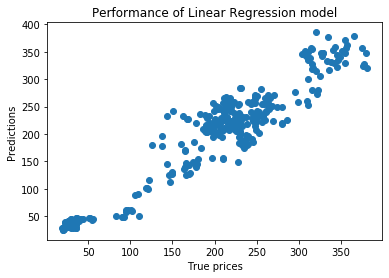

In [136]:
accuracies = []

for name, model in models.items():
    print(name)
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    accuracies.append(acc)
    ##
    print("Accuracy: ", acc)
    print()
    

print()
model = LinearRegression()
model.fit(x_train, y_train)
plt.scatter(y_test, model.predict(x_test))
plt.title("Performance of Linear Regression model")
plt.xlabel("True prices")
plt.ylabel("Predictions")

We can see that Support Vector Machine (SVM) model performed the best with an accuracy score of over 0.95. Thus, we can use SVM to forecast Tesla stock prices for the following 30 days.

In [148]:
x_pred = np.array(df.drop(['Prediction'], 1))[-n:]

best_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
best_model.fit(x_train, y_train)
prediction = best_model.predict(x_pred)
print(prediction)
print()

[362.21496541 358.01991441 333.41504113 355.56653685 349.62051882
 316.67102828 315.07013625 338.46761036 343.0279223  322.07194847
 348.07539806 347.05481764 354.16612227 317.42072168 347.45132807
 317.65607982 350.39039446 349.65514149 317.13756472 328.33327801
 350.89137066 352.1699799  346.2649733  354.10077428 325.3945571
 329.510685   338.34230922 334.12067707 326.21425777 244.42859791]



We can output the predicted values above and place them in lieu of the missing predictions seen in our dataframe earlier.

In [152]:
pd.DataFrame(prediction).to_csv("stock_predictions_outpt.txt", index=False, header=False)

for i in range(0, n):
    df['Prediction'][i + len(df)-30] = best_model.predict(x_pred)[i]

print(df[len(df)-30:])

            Adj. Close  Prediction
Date                              
2018-02-13     323.660  362.214965
2018-02-14     322.310  358.019914
2018-02-15     334.065  333.415041
2018-02-16     335.490  355.566537
2018-02-20     334.770  349.620519
2018-02-21     333.300  316.671028
2018-02-22     346.170  315.070136
2018-02-23     352.050  338.467610
2018-02-26     357.420  343.027922
2018-02-27     350.990  322.071948
2018-02-28     343.060  348.075398
2018-03-01     330.930  347.054818
2018-03-02     335.120  354.166122
2018-03-05     333.350  317.420722
2018-03-06     328.200  347.451328
2018-03-07     332.300  317.656080
2018-03-08     329.100  350.390394
2018-03-09     327.170  349.655141
2018-03-12     345.510  317.137565
2018-03-13     341.840  328.333278
2018-03-14     326.630  350.891371
2018-03-15     325.600  352.169980
2018-03-16     321.350  346.264973
2018-03-19     313.560  354.100774
2018-03-20     310.550  325.394557
2018-03-21     316.530  329.510685
2018-03-22     309.1